In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import datetime as dt
import numpy as np
import pandas as pd
import keras

import matplotlib.pyplot as plt
import seaborn as sns

import os
from keras.applications import xception
from keras.preprocessing import image
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import cv2
from scipy.stats import uniform

from tqdm import tqdm
from glob import glob

from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Masking
# from tensorflow.keras.utils import np_utils, to_categorical
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import MobileNetV2
import tensorflow as tf


In [ ]:
base_folder = ''
data = '/content/drive/MyDrive/CMPE295A/Dataset/FinalTestImages'

categories = ['Fire', 'NoFire']
len_categories = len(categories)

image_count = {}
test_data = []

for i , category in tqdm(enumerate(categories)):
    class_folder = os.path.join(data, category)
    label = category
    image_count[category] = []
    
    for path in os.listdir(os.path.join(class_folder)):
        image_count[category].append(category)
        test_data.append(['{}/{}'.format(category, path), i, category])

In [ ]:
#show image count
for key, value in image_count.items():
    print('{0} -> {1}'.format(key, len(value)))

Fire -> 4306
NoFire -> 1710


In [ ]:
#create a dataframe
df = pd.DataFrame(test_data, columns=['file', 'id', 'label'])
df.shape
df.head()

,file,id,label
0,Fire/HelmetCam2ndAlarmDwellingFire2017.png,0,Fire
1,Fire/HelmetCam2ndAlarmDwellingFire2062.png,0,Fire
2,Fire/HelmetCam2ndAlarmDwellingFire1997.png,0,Fire
3,Fire/HelmetCam2ndAlarmDwellingFire2007.png,0,Fire
4,Fire/HelmetCam2ndAlarmDwellingFire2002.png,0,Fire


In [ ]:
def read_img(filepath, size):
    img = image.load_img(os.path.join(data, filepath), target_size=size)
    #convert image to array
    img = image.img_to_array(img)
    return img

In [ ]:
INPUT_SIZE=224

##preprocess the input
X_test = np.zeros((len(df), INPUT_SIZE, INPUT_SIZE, df.shape[1]), dtype='float')
for i, file in tqdm(enumerate(df['file'])):
    img = read_img(file,(INPUT_SIZE,INPUT_SIZE))
    x = tf.keras.applications.inception_v3.preprocess_input(np.expand_dims(img, axis=0))
    X_test[i] = x



6016it [00:31, 189.54it/s]


In [ ]:
INPUT_SIZE=224

##preprocess the input
X_test = np.zeros((len(df), INPUT_SIZE, INPUT_SIZE, df.shape[1]), dtype='float')
for i, file in tqdm(enumerate(df['file'])):
    img = read_img(file,(INPUT_SIZE,INPUT_SIZE))

    x = tf.keras.applications.mobilenet_v2.preprocess_input(np.expand_dims(img, axis=0))
    X_test[i] = x

In [ ]:
y_test = df['id']

#VGG

In [ ]:
from tensorflow import keras
model_VGG = keras.models.load_model('/content/drive/MyDrive/CMPE295A/Dataset/classification-models/VGG_trained_model_v1.hdf5')

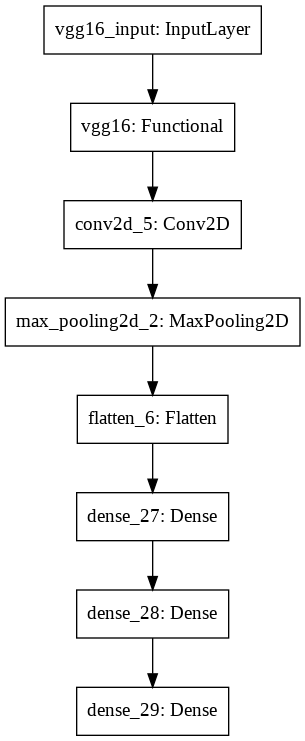

In [ ]:
import keras
keras.utils.plot_model(model_VGG, "VGG.png")

In [ ]:
model_prediction_VGG = (model_VGG.predict(X_test)>0.8).astype(np.int64)

In [ ]:
print('The accuracy of VGG model over Validation set is:',accuracy_score(y_test,model_prediction_VGG))
confusion_matrix(y_test,model_prediction_VGG)

The accuracy of VGG model over Validation set is: 0.7175864361702128


array([[2968, 1338],
       [ 361, 1349]])

In [ ]:
print((classification_report(y_test,model_prediction_VGG)))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      4306
           1       0.50      0.79      0.61      1710

    accuracy                           0.72      6016
   macro avg       0.70      0.74      0.70      6016
weighted avg       0.78      0.72      0.73      6016



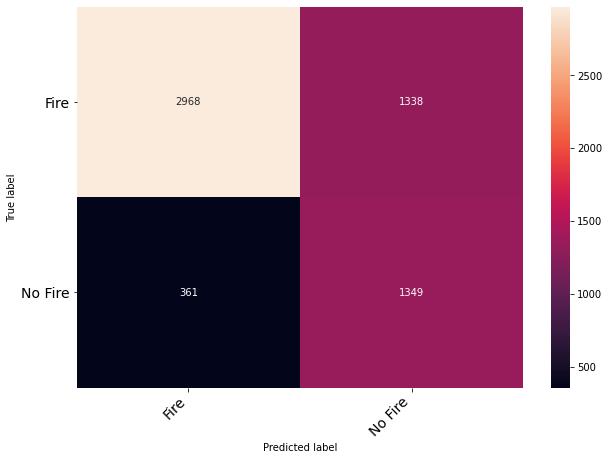

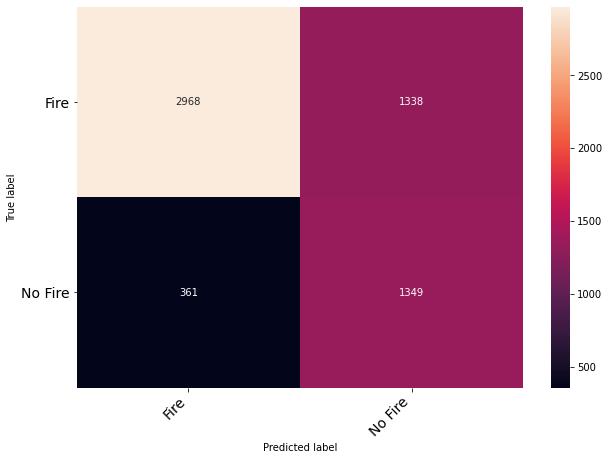

In [ ]:
cm = confusion_matrix(y_test,model_prediction_VGG)
print_confusion_matrix(cm,Class_Name)

#MobileNet

In [ ]:
model_mobilenet = keras.models.load_model('/content/drive/MyDrive/CMPE295A/Dataset/classification-models/MobileNet_V2_.h5')

In [ ]:
model_prediction_mobilenet = model_mobilenet.predict(X_test)


In [ ]:
model_prediction_mobilenet = (model_prediction_mobilenet>0.5).astype(np.int64)

In [ ]:
# y_pred=np.argmax(model_prediction_mobilenet, axis=-1) 
# y_pred[y_pred<0.5] = 1
# y_pred[y_pred>=0.5] = 0
# y_pred = y_pred.astype('int')

In [ ]:
print('The accuracy of Mobile Net model over Validation set is:',accuracy_score(y_test,model_prediction_mobilenet))
confusion_matrix(y_test,model_prediction_mobilenet)

The accuracy of Mobile Net model over Validation set is: 0.8292885638297872


array([[4192,  114],
       [ 913,  797]])

In [ ]:
print((classification_report(y_test,model_prediction_mobilenet)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4306
           1       0.87      0.47      0.61      1710

    accuracy                           0.83      6016
   macro avg       0.85      0.72      0.75      6016
weighted avg       0.84      0.83      0.81      6016



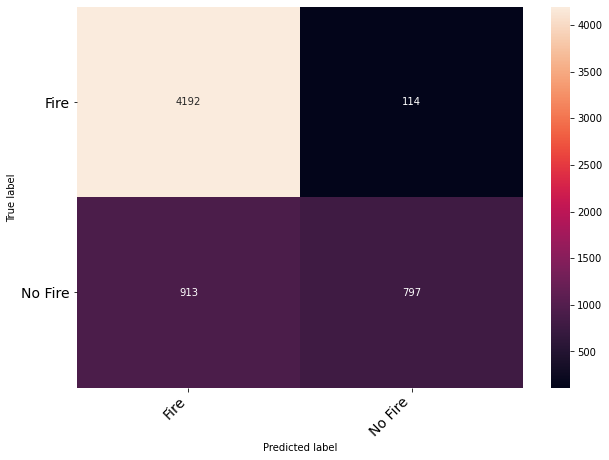

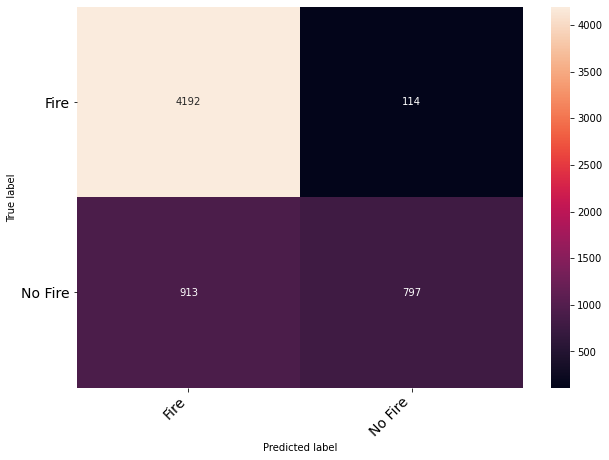

In [ ]:
cm = confusion_matrix(y_test,model_prediction_mobilenet)
print_confusion_matrix(cm,Class_Name)

#Inception

In [ ]:
model_inf = keras.models.load_model('/content/drive/MyDrive/CMPE295A/Dataset/classification-models/Incepiton_trained_model (1).hdf5')

In [ ]:
model_prediction_inf = (model_inf.predict(X_test)>0.5).astype(np.int64)

In [ ]:
print('The accuracy of this model over Validation set is:',accuracy_score(y_test,model_prediction_inf))
confusion_matrix(y_test,model_prediction_inf)

The accuracy of this model over Validation set is: 0.9012632978723404


array([[4042,  264],
       [ 330, 1380]])

In [ ]:
print((classification_report(y_test,model_prediction_inf)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4306
           1       0.84      0.81      0.82      1710

    accuracy                           0.90      6016
   macro avg       0.88      0.87      0.88      6016
weighted avg       0.90      0.90      0.90      6016



In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [ ]:
Class_Name = ['Fire', 'No Fire']

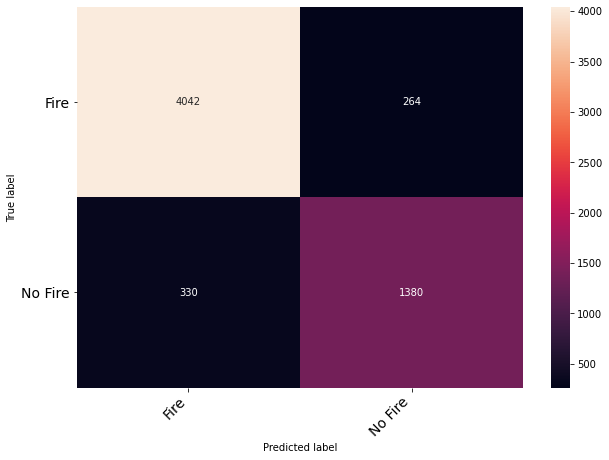

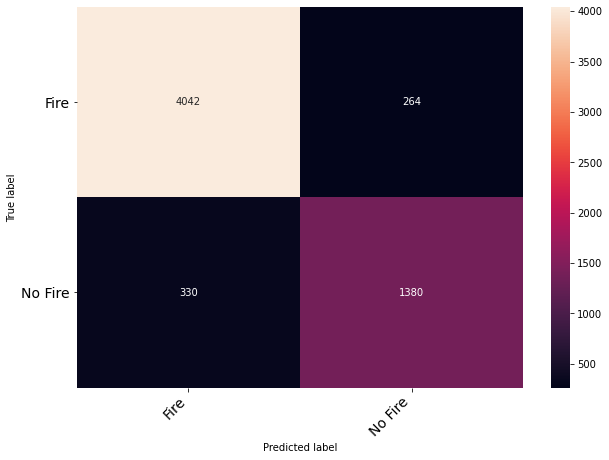

In [ ]:
cm = confusion_matrix(y_test,model_prediction_inf)
print_confusion_matrix(cm,Class_Name)

#Resnet50

In [ ]:
model_rn = keras.models.load_model('/content/drive/MyDrive/CMPE295A/Dataset/classification-models/resnet_sigmoid.h5')

In [ ]:
model_prediction_rn = model_rn.predict(X_test)

In [ ]:
model_prediction_rn = (model_prediction_rn >0.5).astype(np.int64)

In [ ]:
print('The accuracy of this model over Validation set is:',accuracy_score(y_test,model_prediction_rn))
confusion_matrix(y_test,model_prediction_rn)

The accuracy of this model over Validation set is: 0.47689494680851063


array([[1183, 3123],
       [  24, 1686]])

In [ ]:
print((classification_report(y_test,model_prediction_rn)))

              precision    recall  f1-score   support

           0       0.98      0.27      0.43      4306
           1       0.35      0.99      0.52      1710

    accuracy                           0.48      6016
   macro avg       0.67      0.63      0.47      6016
weighted avg       0.80      0.48      0.45      6016



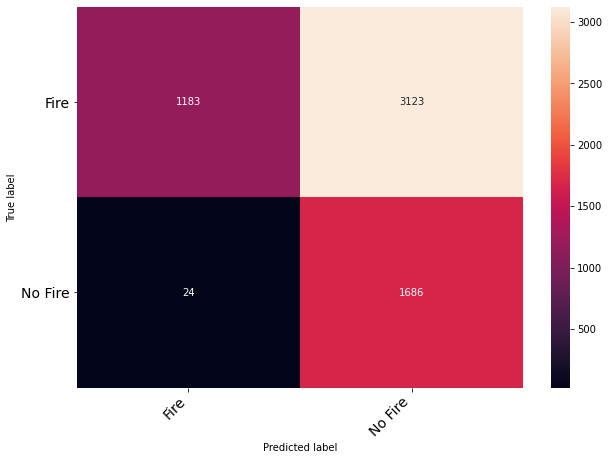

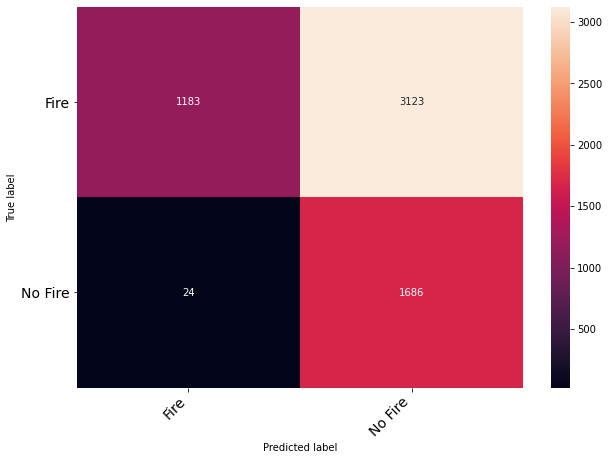

In [ ]:
cm = confusion_matrix(y_test,model_prediction_rn)
print_confusion_matrix(cm,Class_Name)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<function matplotlib.pyplot.show>

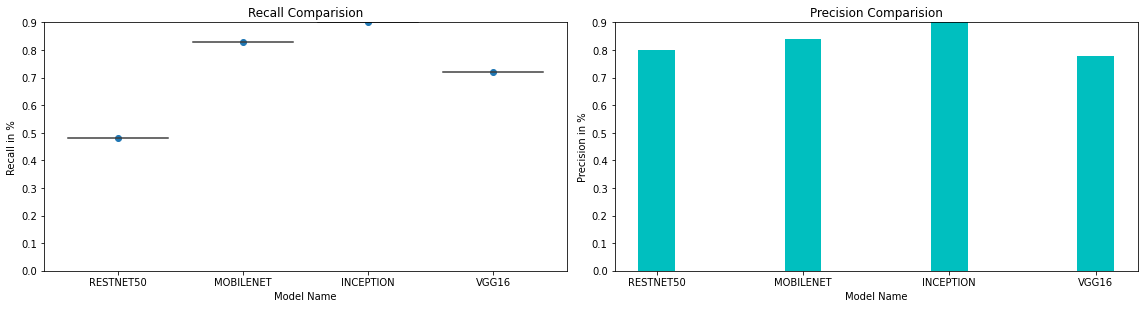

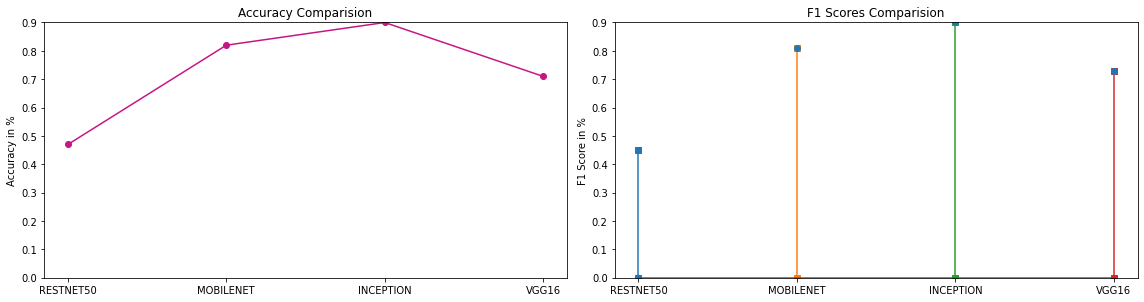

In [5]:
Comparison_df_2 = pd.read_excel("/content/ModelComparison.xlsx")
Comparison_df_2
fig=plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.violinplot(Comparison_df_2["Model Name"], Comparison_df_2["Weighted Recall"], scale='width', inner='quartile')
plt.scatter(Comparison_df_2["Model Name"], Comparison_df_2["Weighted Recall"])
plt.ylim(0,0.9)
plt.ylabel('Recall in %')
plt.title('Recall Comparision')


plt.subplot(2,2,2)
plt.bar(Comparison_df_2["Model Name"], Comparison_df_2["WeightedPrecision"], color='c', width=.25)
plt.ylim(0,0.9)
plt.ylabel('Precision in %')
plt.xlabel('Model Name')
plt.title('Precision Comparision')
plt.tight_layout()
#fig.savefig("comparision_results_Precision Recall.pdf")


fig=plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(Comparison_df_2["Model Name"], Comparison_df_2["Accuracy"], marker='o', color='mediumvioletred')
plt.title("Accuracy Comparision")
plt.ylabel('Accuracy in %')
plt.ylim(0,0.9)

plt.subplot(2,2,2)
plt.stem(Comparison_df_2["Model Name"], Comparison_df_2["Weighted F1-score"], '-s')
plt.ylim(0,0.9)
plt.title("F1 Scores Comparision")
plt.ylabel('F1 Score in %')
plt.tight_layout()
fig.savefig("comparision_results_F1Score_Accuracy.pdf")
plt.show

#Infer Some Test Images

In [ ]:
df12 = df[5000:-30]


In [ ]:
df12

,file,id,label
5000,NoFire/2ndAlarmFire117N10992.png,1,NoFire
5001,NoFire/2ndAlarmFire117N3540.png,1,NoFire
5002,NoFire/2ndAlarmFire117N10437.png,1,NoFire
5003,NoFire/2ndAlarmFire117N10969.png,1,NoFire
5004,NoFire/2ndAlarmFire117N10899.png,1,NoFire
...,...,...,...
5981,NoFire/CarInFlames-FireFighterHelmetCam4156.png,1,NoFire
5982,NoFire/CarInFlames-FireFighterHelmetCam7532.png,1,NoFire
5983,NoFire/CarInFlames-FireFighterHelmetCam7768.png,1,NoFire
5984,NoFire/CarInFlames-FireFighterHelmetCam562.png,1,NoFire


In [ ]:
df12 = df12.sample()
df12['new_file'] = df12['file'].str.split(' ') 
df12.new_file

In [ ]:
CLASSES = ['Fire', 'No Fire']

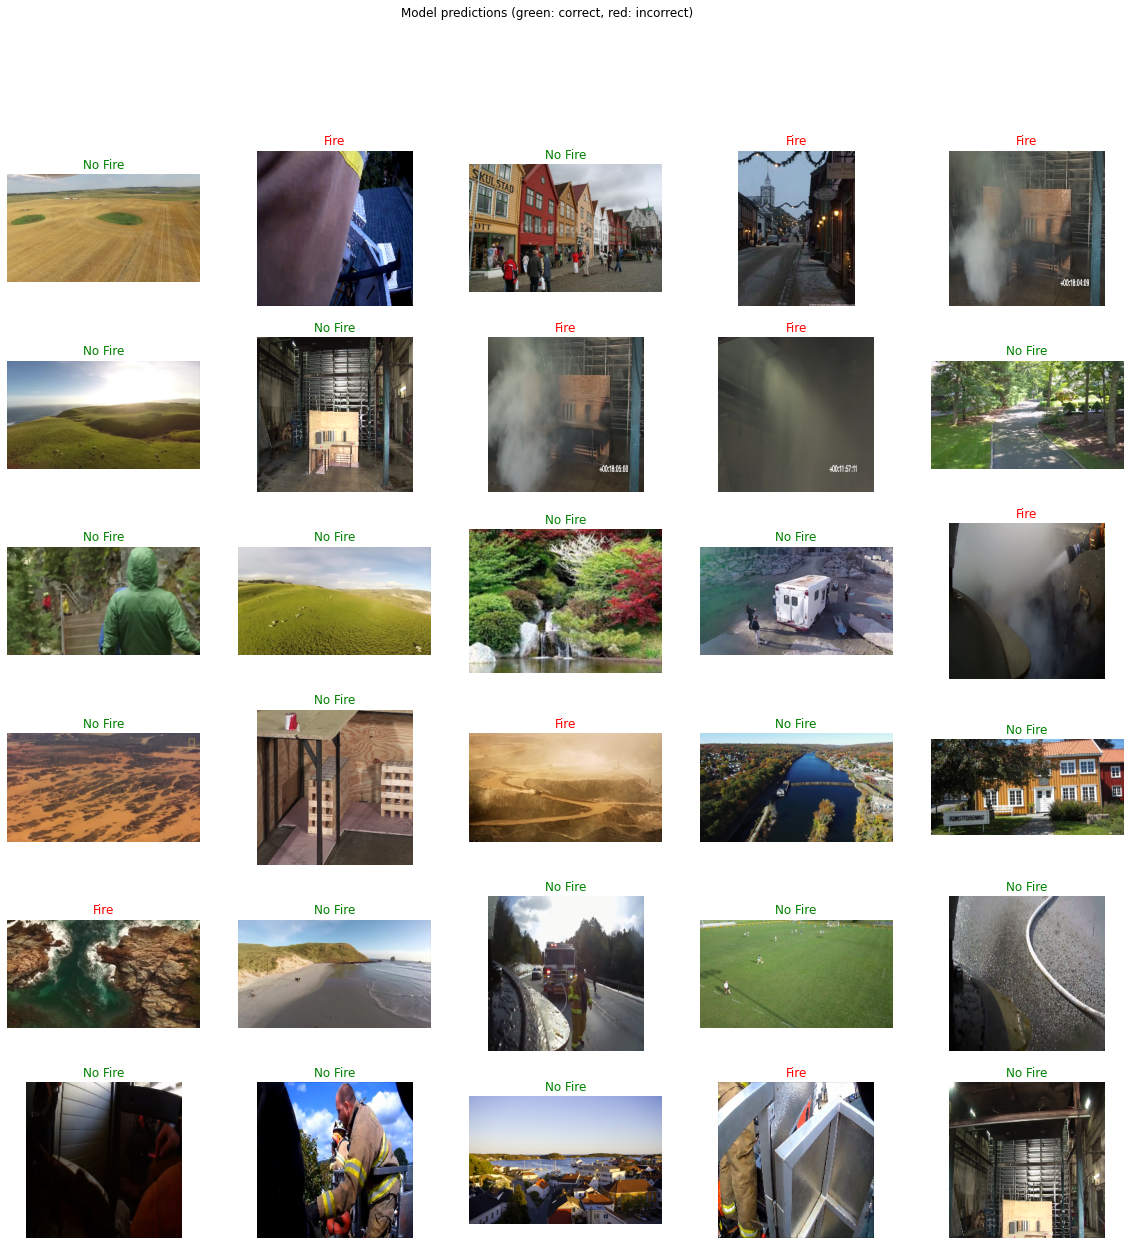

In [ ]:
true_label_ids=y_test
predicted_ids=model_prediction_mobilenet
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.2)
for n in range(30):
  plt.subplot(6,5,n+1)
  sample_df_no = random.randint(5000, 6000)
  image =  matplotlib.pyplot.imread('/content/drive/MyDrive/CMPE295A/Dataset/FinalTestImages/'+ df12.file[sample_df_no])
  plt.imshow(image)
  color = "green" if predicted_ids[sample_df_no] == true_label_ids[sample_df_no] else "red"
  plt.title(CLASSES[predicted_ids[sample_df_no][0]], color=color)
  #plt.title(predicted_ids[n], color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")